In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '/content/drive/MyDrive/Customer_Lifetime_Value_Analysis.csv'
df = pd.read_csv(path)

### 1. Introduction

#### 1.1 Context

Understanding customer engagement and lifetime value is critical for optimizing business growth. This analysis focuses on segmenting users and predicting Customer Lifetime Value (CLV) to identify high-value customers and tailor strategic decisions in marketing and resource allocation.

#### 1.2 Goal


The primary objectives of this analysis are twofold:

Customer Segmentation: To categorize library users into distinct segments based on their behaviors and engagement metrics. This segmentation will help identify unique user groups and tailor specific strategies to enhance user satisfaction and value.

CLV Prediction: To forecast the lifetime value of each customer using predictive modeling techniques. This allows us to determine which customer segments are the most valuable or important for our private library. The insights gained from this prediction will guide targeted retention initiatives and maximize revenue generation from our user base.

In [ ]:
print("This dataset provides information on customer transactions and demographics, used to analyze Customer Lifetime Value (CLV), Retention Rate, and Profit.")

# Example dictionary as a pandas DataFrame for clear presentation
data_dict = {
    'Column': ['Member Number', 'Gender', 'Registration Date', 'Age Group', 'Average Order Value', 'CLV'],
    'Description': [
        'Unique identifier for each customer',
        'Gender of the customer',
        'Date the customer registered',
        'Age group classification of the customer',
        'Average amount spent per order',
        'Customer Lifetime Value'
    ],
    'Type': ['Integer', 'Categorical', 'Date', 'Categorical', 'Float', 'Float']
}
import pandas as pd
data_dictionary = pd.DataFrame(data_dict)
print("Data Dictionary:")
print(data_dictionary)

print("The goal of this analysis is to identify factors affecting Customer Lifetime Value (CLV), Retention Rate, and Profit, and to understand customer segments with high CLV.")

# Proceed with basic structural exploration
print("Data Shape:", df.shape)
print("\nData Info:")
print(df.info())

# Further EDA steps, such as visualizing distributions, correlations, and handling missing data, would follow here.


This dataset provides information on customer transactions and demographics, used to analyze Customer Lifetime Value (CLV), Retention Rate, and Profit.
Data Dictionary:
                Column                               Description         Type
0        Member Number       Unique identifier for each customer      Integer
1               Gender                    Gender of the customer  Categorical
2    Registration Date              Date the customer registered         Date
3            Age Group  Age group classification of the customer  Categorical
4  Average Order Value            Average amount spent per order        Float
5                  CLV                   Customer Lifetime Value        Float
The goal of this analysis is to identify factors affecting Customer Lifetime Value (CLV), Retention Rate, and Profit, and to understand customer segments with high CLV.
Data Shape: (782, 14)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data colum

### 2. Exploratory Data Analysis (EDA)

#### 2.1 Data Structure

In [ ]:
# Print basic information about the dataset
print("Basic Information:")
print(df.info())

# Generate descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values and show the count per column
print("\nMissing Values:")
print(df.isnull().sum())

# Show the first 10 rows of the dataset for a quick data preview
print("\nFirst 10 rows of the dataset:")
print(df.head(10))

# Convert columns with commas to float where applicable
for column in ['Average Order Value', 'Customer Lifetime', 'Total Registration Cost', 'Gross Profit Margin']:
    df[column] = df[column].astype(str).str.replace(',', '').astype(float)

# Convert specific columns to appropriate data types
df['Member Number'] = df['Member Number'].astype(int)
df['Gender'] = pd.Categorical(df['Gender'])
df['Registration Date'] = pd.to_datetime(df['Registration Date'], errors='coerce')
df['Expiration Date'] = pd.to_datetime(df['Expiration Date'], errors='coerce')
df['Age Group'] = pd.Categorical(df['Age Group'])
df['Target Exam'] = pd.Categorical(df['Target Exam'])

# Confirm data types after conversion
print("\nData Types after Conversion:")
print(df.dtypes)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Member Number                782 non-null    int64  
 1   Gender                       782 non-null    object 
 2   Registration Date            782 non-null    object 
 3   Expiration Date              782 non-null    object 
 4   Age Group                    782 non-null    object 
 5   Target Exam                  716 non-null    object 
 6   Average Order Value          782 non-null    int64  
 7   Customer Lifetime            782 non-null    float64
 8   Total Registration Cost      782 non-null    object 
 9   Retention                    782 non-null    int64  
 10  Customer Purchase Frequency  782 non-null    float64
 11  Gross Profit Margin          782 non-null    float64
 12  Churn Rate                   782 non-null    int64  
 13  D

#### 2.2 Dealing with Missing Data

In [ ]:
# Check for missing values and calculate the percentage of missing values
missing_values = round(df.isna().mean() * 100, 2)
print("Missing Values (%):\n", missing_values)

# Handle missing values in the 'Target Exam' column by dropping rows with missing values in this column
df.dropna(subset=['Target Exam'], inplace=True)
print("\nRows with missing 'Target Exam' values have been removed.")

# Verify if any missing values remain in the dataset
print("\nRemaining Missing Values:\n", df.isnull().sum())

Missing Values (%):
 Member Number                  0.00
Gender                         0.00
Registration Date              0.00
Expiration Date                0.00
Age Group                      0.00
Target Exam                    8.44
Average Order Value            0.00
Customer Lifetime              0.00
Total Registration Cost        0.00
Retention                      0.00
Customer Purchase Frequency    0.00
Gross Profit Margin            0.00
Churn Rate                     0.00
Discount Rate                  0.00
dtype: float64

Rows with missing 'Target Exam' values have been removed.

Remaining Missing Values:
 Member Number                  0
Gender                         0
Registration Date              0
Expiration Date                0
Age Group                      0
Target Exam                    0
Average Order Value            0
Customer Lifetime              0
Total Registration Cost        0
Retention                      0
Customer Purchase Frequency    0
Gross Prof

The **'Target Exam'** column has missing values because some users did not specify their target exam. For the purpose of this analysis, we decided to remove rows with missing values in the 'Target Exam' column to ensure data completeness.

This approach allows us to work with a fully populated dataset in subsequent analyses. After removing the rows, we confirmed that no missing values remain in the dataset, allowing us to proceed with confidence in the integrity of the data.

#### 2.3 Visualize Data

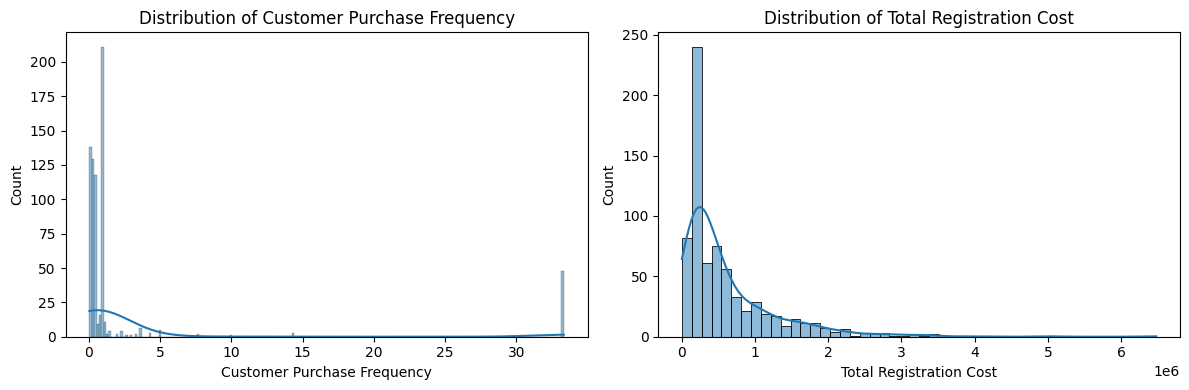

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical columns
numerical_cols = ['Customer Purchase Frequency', 'Total Registration Cost']

# Plot histograms for numerical columns in a single row
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


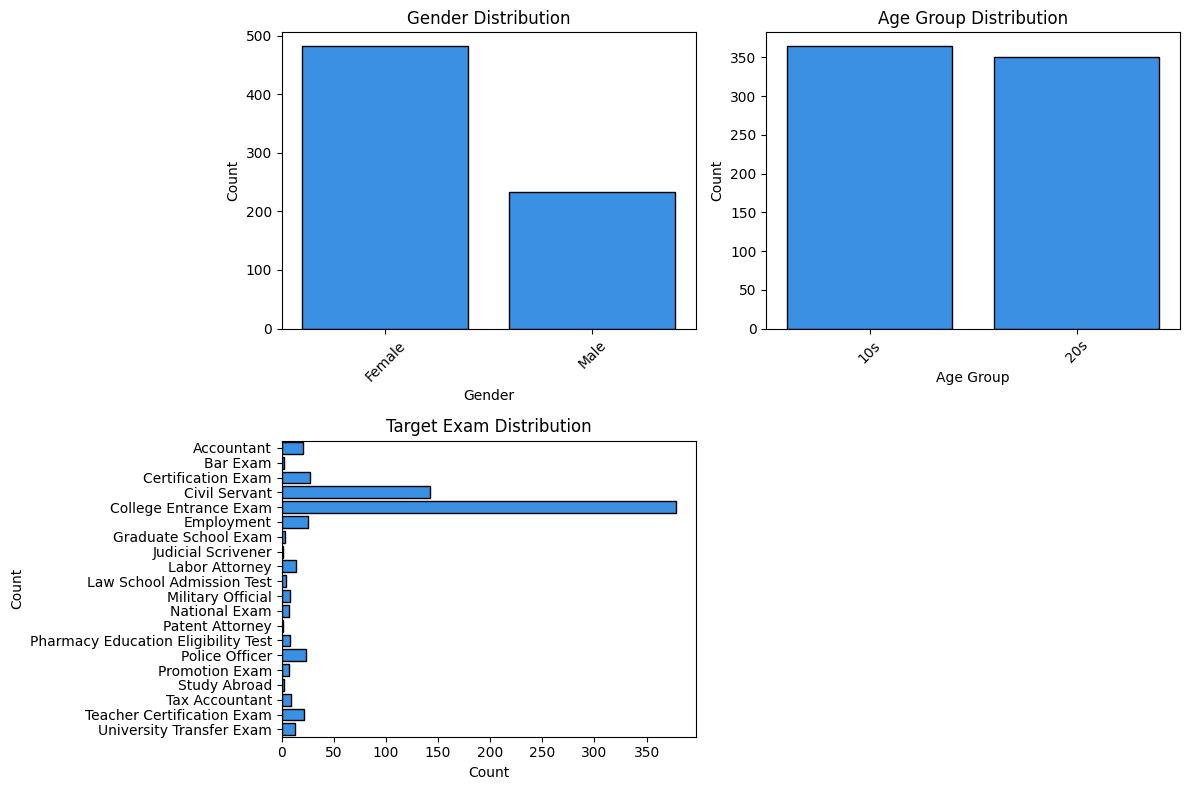

In [ ]:
# Filter out '40대' from 'Age Group' and create a new DataFrame
filtered_df = df[df['Age Group'] != '40대'].copy()
filtered_df['Age Group'] = filtered_df['Age Group'].cat.remove_categories('40대')

# Define categorical columns
categorical_cols = filtered_df.select_dtypes(include=['category']).columns

# Set up the subplots grid for categorical data
import math
num_plots = len(categorical_cols)
cols = 2
rows = math.ceil(num_plots / cols)

fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))
axes = axes.flatten()

# Loop through each categorical column and plot
for i, col in enumerate(categorical_cols):
    if col == 'Target Exam':
        sns.countplot(data=filtered_df, y=col, edgecolor='black', color='dodgerblue', ax=axes[i])
        axes[i].set_xlabel('Count')
    else:
        sns.countplot(data=filtered_df, x=col, edgecolor='black', color='dodgerblue', ax=axes[i])
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'{col} Distribution')

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



We excluded data from the "40대" (40s age group) to focus on younger demographics, which are more representative in this dataset.

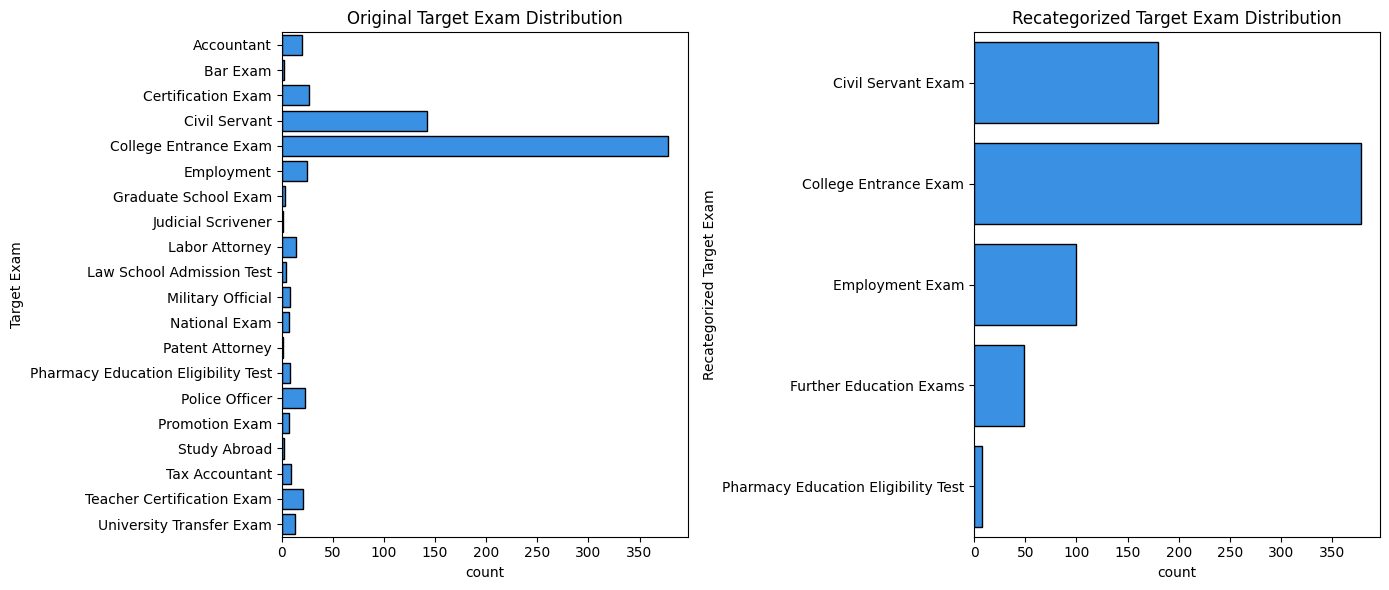

In [ ]:
# Recategorization function
def recategorize_target_exam(exam):
    if exam in ['Civil Servant', 'Military Official', 'Police Officer', 'Promotion Exam']:
        return 'Civil Servant Exam'
    elif exam in ['Employment', 'Accountant', 'Bar Exam', 'Judicial Scrivener', 'Labor Attorney',
                  'National Exam', 'Patent Attorney', 'Tax Accountant', 'Teacher Certification Exam']:
        return 'Employment Exam'
    elif exam in ['Certification Exam', 'Graduate School Exam', 'Law School Admission Test',
                  'Pharmacy Education Eligibility', 'Study Abroad', 'University Transfer Exam']:
        return 'Further Education Exams'
    else:
        return exam

# Apply the recategorization
filtered_df['Recategorized Target Exam'] = filtered_df['Target Exam'].apply(recategorize_target_exam)

# Set up subplots for comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(data=filtered_df, y='Target Exam', edgecolor='black', color='dodgerblue', ax=axes[0])
axes[0].set_title('Original Target Exam Distribution')
sns.countplot(data=filtered_df, y='Recategorized Target Exam', edgecolor='black', color='dodgerblue', ax=axes[1])
axes[1].set_title('Recategorized Target Exam Distribution')
plt.tight_layout()
plt.show()



Many respondents listed "College Entrance Exam" as their "Target Exam," which made other subcategories, such as "Military Official," "Police Officer," "Promotion Exam," "Accountant," "Bar Exam," "Judicial Scrivener," "Labor Attorney," "National Exam," "Patent Attorney," "Tax Accountant," "Teacher Certification Exam," "Certification Exam," "Graduate School Exam," "Law School Admission Test," "Pharmacy Education Eligibility Test," "Study Abroad," and "University Transfer Exam" appear sparse by comparison. To address this imbalance, the exams were recategorized into broader groups, and the distribution was adjusted accordingly. Each recategorized group now represents a more balanced percentage of the total.

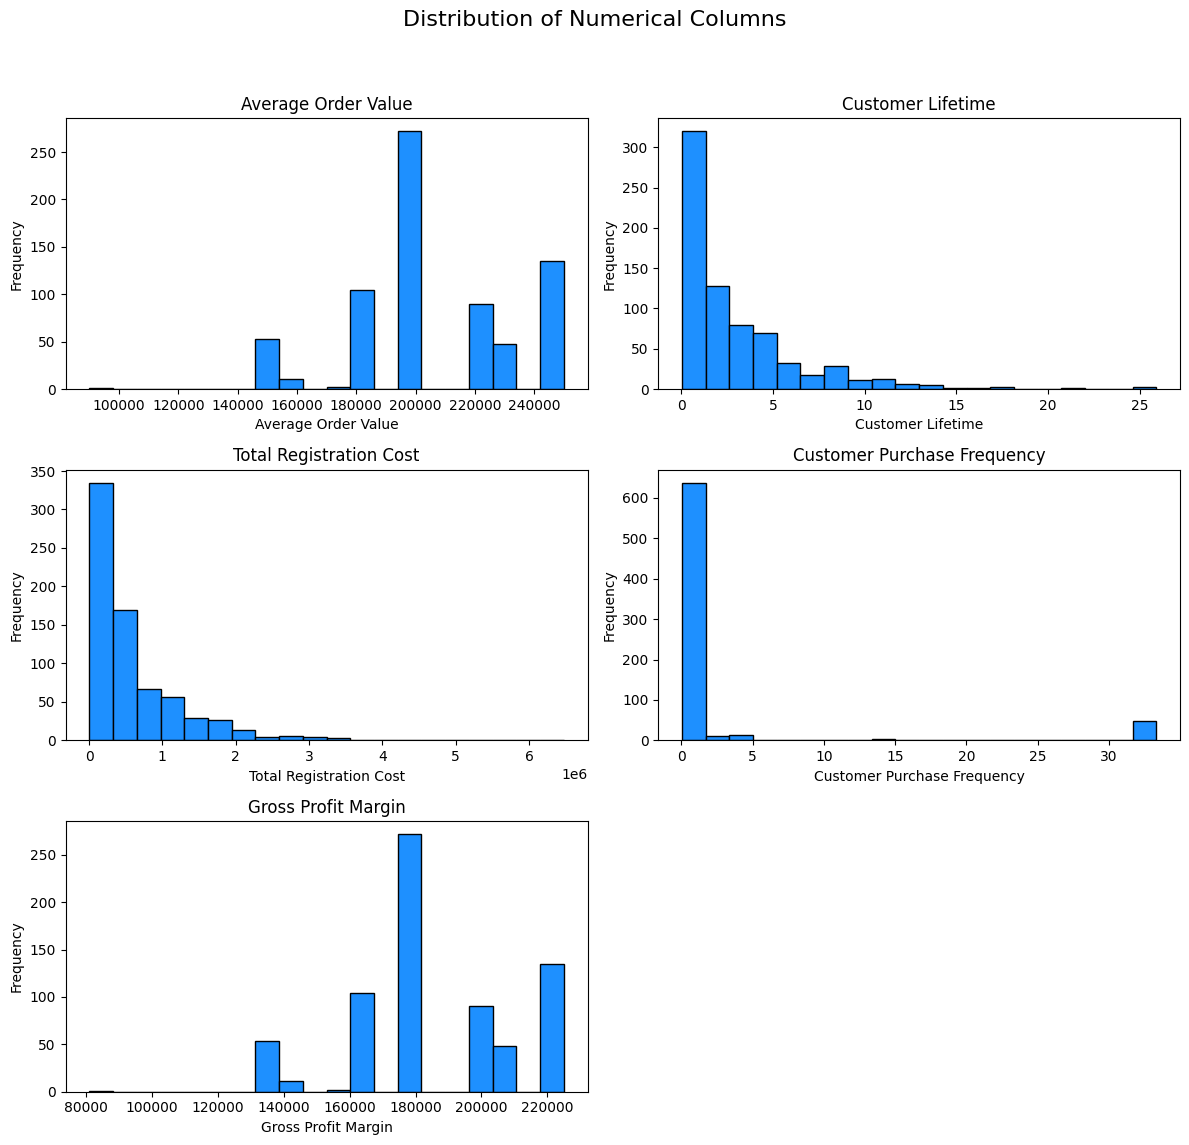

In [ ]:
exclude_columns = ['Member Number', 'Discount Rate', 'Churn Rate', 'Retention']
numerical_cols = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col not in exclude_columns]

num_plots = len(numerical_cols)
cols = 2
rows = (num_plots + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))
fig.suptitle('Distribution of Numerical Columns', fontsize=16)

for i, col in enumerate(numerical_cols):
    ax = axes[i // cols, i % cols]
    ax.hist(df[col], bins=20, color='dodgerblue', edgecolor='black')
    ax.set_title(f'{col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j // cols, j % cols])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


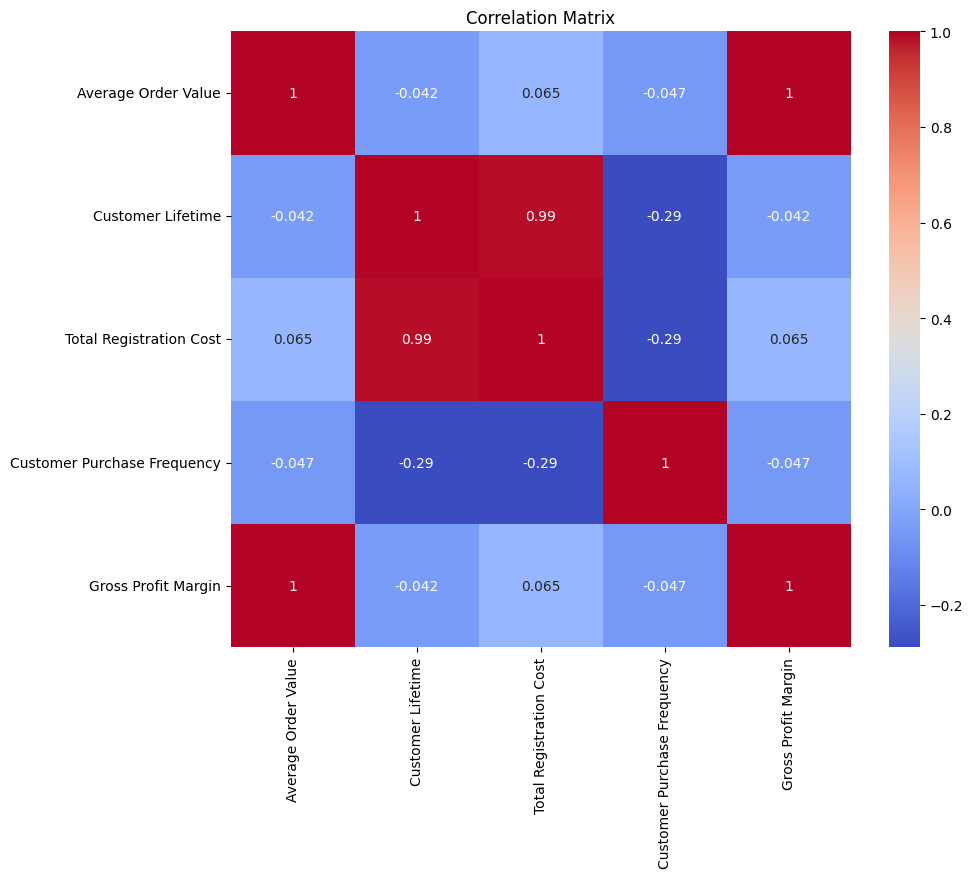

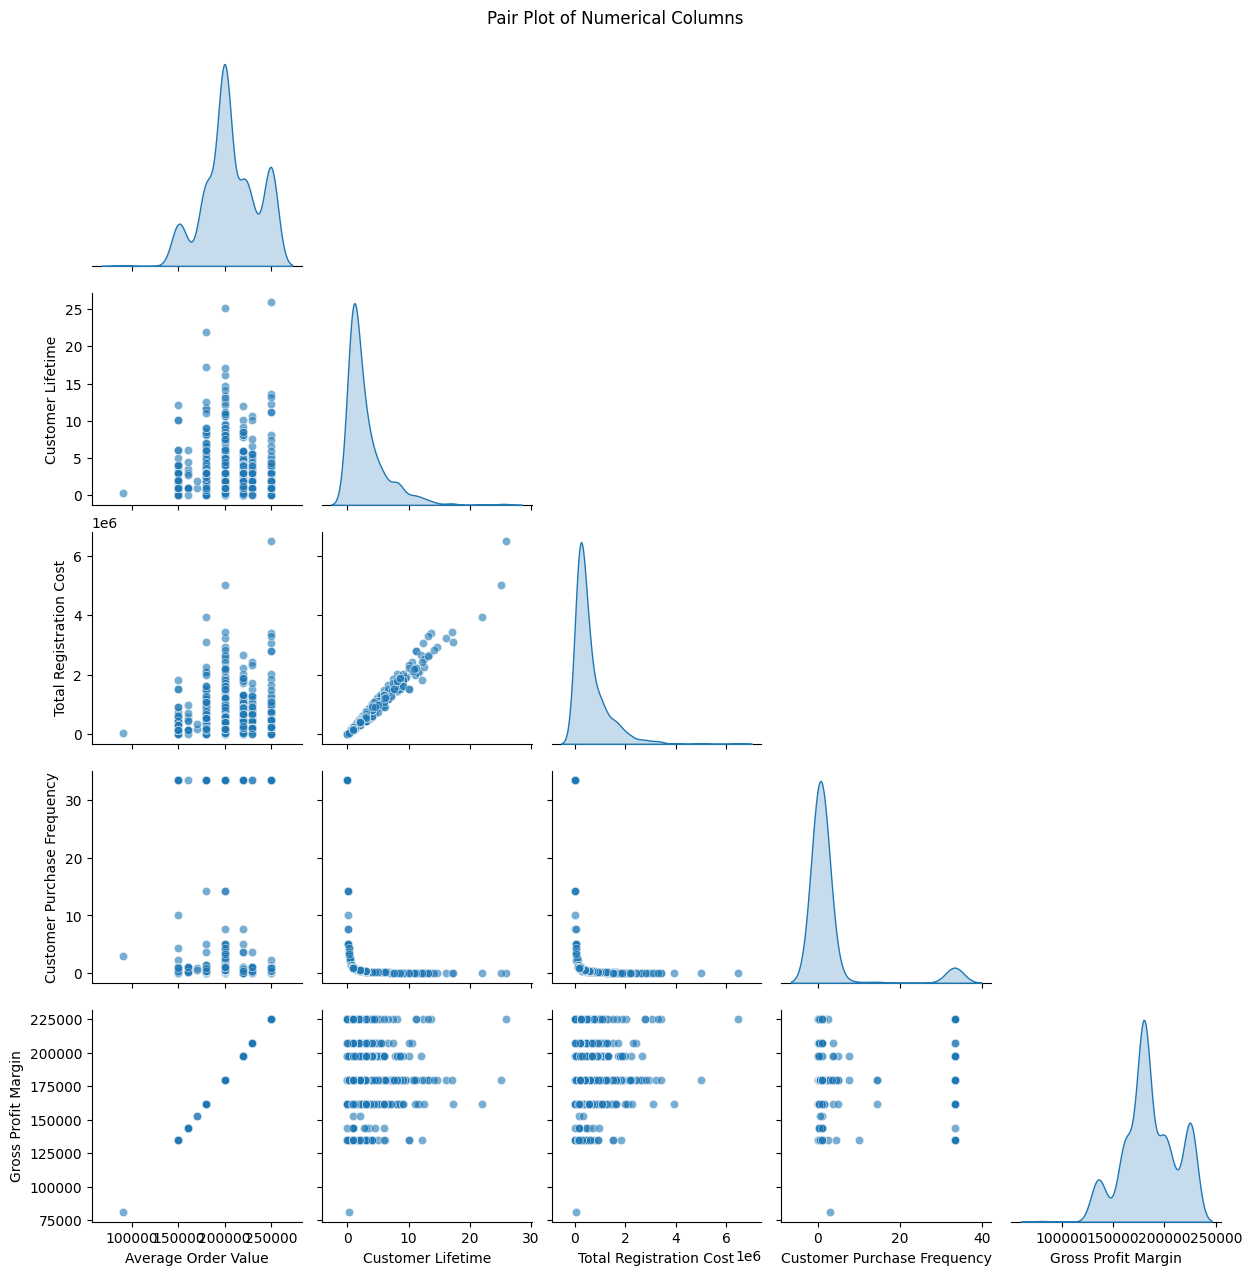

In [ ]:
# Correlation Matrix
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Pair Plot
sns.pairplot(df[numerical_cols], diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Numerical Columns', y=1.02)
plt.show()


Pair Plot Observations:

Average Order Value: The distribution shows a peak around 200,000, with slight rises at both tails. This creates a mountain-like shape where values around 200,000 are the most common, and the frequencies taper off with small upticks at the extremes.

Customer Lifetime: The distribution is right-skewed with a short tail, where most values are concentrated on the left side, peaking sharply and tapering off quickly without a long right tail.

Total Registration Cost: The distribution is right-skewed with a short tail, similar to Customer Lifetime. Most values are concentrated at the lower end, and there is a strong positive correlation with Customer Lifetime, suggesting that as customer lifetime increases, total registration cost also tends to increase.

Customer Purchase Frequency: Most data points are concentrated at lower frequencies, with higher frequencies being relatively rare.

Gross Profit Margin: The distribution shape is similar to Average Order Value, showing a peak around similar values.

Outliers: There are notable outliers in both Customer Lifetime and Customer Purchase Frequency, which may require further investigation.



#### 2.4 Pre-processing

**In this section, we perform essential data cleaning and preparation steps to ready our dataset for analysis.**

**Data Cleaning**: We handle missing values, standardize formats, and ensure that key numerical columns, such as 'Total Registration Cost,' are correctly formatted. Additionally, we convert 'Expiration Date' to a datetime format for further feature engineering.

**Feature Engineering**: To enable RFM (Recency, Frequency, and Monetary) analysis, we derive the Recency feature from 'Expiration Date' and utilize 'Total Registration Cost' to calculate Frequency and Monetary values.

**Categorical Encoding**: We apply one-hot encoding to categorical variables, transforming them into a format suitable for analysis.

**Numerical Scaling**: We scale the RFM features to standardize their values, enhancing the performance of clustering algorithms and enabling meaningful comparisons.

**RFM Analysis and Clustering Preparation**: After calculating and scaling the RFM features, we prepare this data for customer segmentation. Specifically, we apply K-means clustering to the standardized RFM features to identify distinct customer segments based on their purchasing behaviors.

In [ ]:
# Convert 'Total Registration Cost' to a numeric format by removing commas
if df['Total Registration Cost'].dtype == 'object':
    df['Total Registration Cost'] = df['Total Registration Cost'].str.replace(',', '').astype(float)

# Convert 'Expiration Date' to datetime format
df['Expiration Date'] = pd.to_datetime(df['Expiration Date'], errors='coerce')

# Calculate Recency based on 'Expiration Date' and current date
current_date = pd.Timestamp.now()
df['Recency'] = (current_date - df['Expiration Date']).dt.days

##### 2.4.1 Data Cleaning & Preparation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Add "Unknown" as a category in all categorical columns, then fill missing values with "Unknown"
for col in df.select_dtypes(include='category').columns:
    if "Unknown" not in df[col].cat.categories:  # Check if "Unknown" is already a category
        df[col] = df[col].cat.add_categories(["Unknown"])
    df[col] = df[col].fillna("Unknown")

# Fill missing values in non-categorical (numeric) columns with 0
numeric_cols = df.select_dtypes(exclude='category').columns
df[numeric_cols] = df[numeric_cols].fillna(0)

# Convert 'Total Registration Cost' to numeric format by removing commas
if df['Total Registration Cost'].dtype == 'object':
    df['Total Registration Cost'] = df['Total Registration Cost'].str.replace(',', '').astype(float)

# Convert 'Registration Date' and 'Expiration Date' to datetime format
df['Registration Date'] = pd.to_datetime(df['Registration Date'], errors='coerce')
df['Expiration Date'] = pd.to_datetime(df['Expiration Date'], errors='coerce')

# Use the most relevant date column for Recency calculation
current_date = pd.Timestamp.now()

if 'Last Interaction Date' in df.columns:  # Preferred column
    df['Last Interaction Date'] = pd.to_datetime(df['Last Interaction Date'], errors='coerce')
    df['Recency'] = (current_date - df['Last Interaction Date']).dt.days
elif 'Expiration Date' in df.columns:  # Fallback to 'Expiration Date'
    df['Recency'] = (current_date - df['Expiration Date']).dt.days
else:
    raise KeyError("Neither 'Last Interaction Date' nor 'Expiration Date' exists in the dataset.")

df['Customer_Tenure'] = (df['Expiration Date'] - df['Registration Date']).dt.days

df['Frequency'] = df['Customer Purchase Frequency']  # Purchase frequency
df['Monetary'] = df['Total Registration Cost']       # Total monetary value

df['Total_Spent'] = df['Total Registration Cost']  # Example variable for total spending
df['Avg_Spent_Per_Day'] = df['Total_Spent'] / df['Customer_Tenure'].replace(0, np.nan)  # Avoid division by zero
df['Recency_Frequency_Ratio'] = df['Recency'] / (df['Frequency'] + 1)  # Adding 1 to prevent division by zero

numerical_cols = ['Recency', 'Frequency', 'Monetary', 'Avg_Spent_Per_Day', 'Customer_Tenure']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nData Cleaning & Preparation completed. Sample of the cleaned dataset:")
print(df[['Customer_Tenure', 'Recency', 'Frequency', 'Monetary', 'Avg_Spent_Per_Day', 'Recency_Frequency_Ratio']].head())



Data Cleaning & Preparation completed. Sample of the cleaned dataset:
   Customer_Tenure   Recency  Frequency  Monetary  Avg_Spent_Per_Day  \
0        -0.193753  1.424288  -0.307291 -0.108066           0.798177   
1         0.782985 -1.155990  -0.337664  0.975561           0.804749   
2         0.528626  1.653720  -0.334019  0.694495           0.809540   
3         0.325139  1.686971  -0.329159  0.408277           0.457429   
4         2.329487  1.357786  -0.348598  2.692432           0.809540   

   Recency_Frequency_Ratio  
0              1189.510490  
1               126.271186  
2              1519.834711  
3              1487.200000  
4              1523.853211  


##### 2.4.2 RFM Feature Calculation

In [ ]:
# Convert relevant date columns to datetime format
df['Registration Date'] = pd.to_datetime(df['Registration Date'], errors='coerce')

# Calculate Customer Tenure
df['Customer_Tenure'] = (df['Expiration Date'] - df['Registration Date']).dt.days

# Define RFM Features
df['Frequency'] = df['Customer Purchase Frequency']  # Ensure this column exists
df['Monetary'] = df['Total Registration Cost']       # Ensure this column exists

# Display a sample of RFM features
print("\nSample of RFM Features:")
print(df[['Customer_Tenure', 'Recency', 'Frequency', 'Monetary']].head())



Sample of RFM Features:
   Customer_Tenure   Recency  Frequency   Monetary
0               70  1.424288       0.43   535900.0
1              166 -1.155990       0.18  1271900.0
2              141  1.653720       0.21  1081000.0
3              121  1.686971       0.25   886600.0
4              318  1.357786       0.09  2438000.0


##### 2.4.3 Standardization of RFM Data for Clustering

In [ ]:
# Import necessary libraries for scaling
from sklearn.preprocessing import StandardScaler

# Define RFM features
rfm_features = ['Recency', 'Frequency', 'Monetary']
rfm_df = df[rfm_features]

# Apply StandardScaler to RFM data
scaler = StandardScaler()
rfm_df_scaled = scaler.fit_transform(rfm_df)

# Display standardized RFM features
rfm_scaled_df = pd.DataFrame(rfm_df_scaled, columns=rfm_features)
print("\nStandardized RFM Features:")
print(rfm_scaled_df.head())



Standardized RFM Features:
    Recency  Frequency  Monetary
0  1.424288  -0.307291 -0.108066
1 -1.155990  -0.337664  0.975561
2  1.653720  -0.334019  0.694495
3  1.686971  -0.329159  0.408277
4  1.357786  -0.348598  2.692432


#### 2.5 Insights from EDA

In this section, we summarize key findings from the Exploratory Data Analysis that informed our modeling approach and feature engineering decisions.

1. **Data Distributions**:
* The distributions of key features such as **Total Registration Cost** and **Customer Purchase Frequency** showed significant variance across customers, indicating a diverse range of spending behaviors and customer engagement levels. This suggested the need for scaling and normalization in the pre-processing step to make these features more suitable for clustering and predictive modeling.

2. **Missing Data**:
* Missing values were observed in some features, particularly in categorical columns. These missing values were handled by imputing a placeholder ('Unknown') for categorical data and filling with zeros for numeric data. This ensured a complete dataset for model training without introducing potential biases.

3. **Outliers and Extreme Values**:
* Some features, such as **Avg_Spent_Per_Day** and **Recency_Frequency_Ratio**, contained extreme values or outliers. These were addressed through adjustments during feature engineering, ensuring they did not disproportionately affect model performance.

4. **RFM Analysis**:
* The RFM (Recency, Frequency, and Monetary) analysis highlighted different customer groups based on spending behavior and recency of interactions, providing useful features for segmentation. This analysis guided the selection of clustering techniques, as these features represent key dimensions of customer engagement and value.

5. **Relationships Among Features**:
* Preliminary analysis showed correlations among certain features (e.g., **Total_Spent** and **Frequency**), suggesting that feature interaction effects might be relevant. This insight informed the choice to experiment with non-linear models, such as Decision Trees and Random Forests, which can capture these relationships more effectively.

### 3. Building Models

**In this section, we implement various models to achieve our analysis goals.**

**Customer Segmentation**: We apply a range of clustering algorithms to segment customers based on Recency, Frequency, and Monetary (RFM) values. Each algorithm provides unique perspectives on grouping customers, allowing us to compare results and identify the optimal segmentation approach.

**CLV Prediction**: We utilize predictive modeling techniques to estimate Customer Lifetime Value (CLV). By identifying significant features that impact CLV, we can build a robust model that helps predict and analyze customer value over time.

#### 3.1 Customer Segmentation

**In this sub-section, we explore different clustering techniques to segment customers based on their purchasing behaviors.**

**KMeans Clustering**: We use the KMeans algorithm as a baseline clustering method, leveraging its simplicity and efficiency. The optimal number of clusters is determined using the Elbow Method to ensure that the segmentation captures meaningful patterns.

**DBSCAN Clustering**: As a density-based algorithm, DBSCAN is valuable for identifying clusters of varying densities, which helps in detecting outliers and naturally grouped customers.

**Agglomerative Clustering**: This hierarchical approach builds nested clusters, allowing us to explore potential hierarchical relationships within customer segments.

**Gaussian Mixture Model (GMM)**: GMM offers a probabilistic approach to clustering, assigning each customer a probability of belonging to each cluster, which provides flexible and soft clustering.

**Self-Organizing Maps (SOM) (Optional)**: SOM is a neural network-based clustering method that maps high-dimensional data into a lower-dimensional grid, useful for visualizing complex relationships within customer segments.

##### 3.1.1 KMeans Clustering

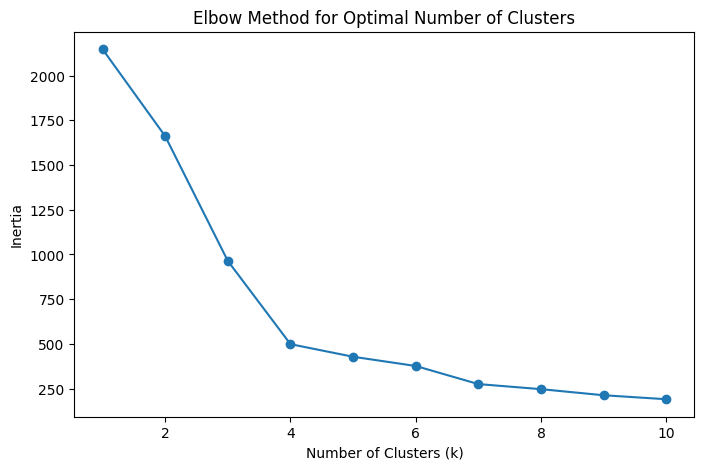

K-Means Silhouette Score: 0.5204529837889008


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load your dataset (replace with actual path or loading method)
# df = pd.read_csv('your_file_path_here.csv')

# Prepare RFM data for clustering (assuming RFM features exist)
rfm_df = df[['Recency', 'Frequency', 'Monetary']].copy()

# Standardize the RFM data
scaler = StandardScaler()
rfm_data_scaled = scaler.fit_transform(rfm_df)

# Elbow Method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_data_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Optimal number of clusters determined from the Elbow Method
optimal_k = 4  # Replace with the actual optimal value from the graph

# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_clusters = kmeans.fit_predict(rfm_data_scaled)

# Calculate Silhouette Score for K-Means
kmeans_silhouette = silhouette_score(rfm_data_scaled, kmeans_clusters)
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

# Append cluster assignments to the original DataFrame
df['KMeans_Cluster'] = kmeans_clusters




**Analysis Results**:

The Elbow Method is used to determine the optimal number of clusters for the dataset. The graph above plots the number of clusters (k) against the inertia, which represents the within-cluster sum of squared distances.

From the graph, a distinct "elbow" is observed at **k=4**, where the rate of inertia reduction starts to diminish significantly. This suggests that adding more clusters beyond 4 yields diminishing returns in terms of improving clustering quality.

**Conclusion**:

Based on the Elbow Method, the optimal number of clusters for this dataset is **4**.

##### 3.1.2 DBSCAN Clustering

###### 3.1.2.1 Hyperparameter Tuning

In [ ]:
# Import necessary libraries
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

# Example scaled data (replace this with your actual scaled RFM data)
# Ensure that rfm_data_scaled is scaled (e.g., using StandardScaler or MinMaxScaler)
# rfm_data_scaled = <your scaled RFM data as a NumPy array or DataFrame>

# Initialize variables for tracking the best parameters
best_eps = None  # Use None initially to catch invalid results
best_score = -1  # Start with -1 as silhouette scores are in range [-1, 1]
best_min_samples = 0

# Hyperparameter tuning loop
for eps in np.arange(0.3, 5.1, 0.1):  # Adjust the eps range as needed
    for min_samples in range(3, 10):  # Adjust the range for min_samples
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(rfm_data_scaled)

        # Evaluate clusters only if valid clusters are formed
        if len(set(labels)) > 1 and -1 not in set(labels):  # Ignore noise-only clusters
            score = silhouette_score(rfm_data_scaled, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

# Validate and print results
if best_eps is None or best_eps <= 0:  # If no valid parameters were found
    print("No valid clusters found during hyperparameter tuning. Adjust eps range or data.")
else:
    print(f"Best DBSCAN Silhouette Score: {best_score:.4f} with eps={best_eps} and min_samples={best_min_samples}")

Best DBSCAN Silhouette Score: 0.6249 with eps=2.2000000000000006 and min_samples=3


###### 3.1.2.2 Clustering Implementation

In [ ]:
# Clustering Implementation with Best Parameters
if best_eps is not None and best_eps > 0:  # Ensure valid parameters are available
    dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
    df['DBSCAN_Cluster'] = dbscan.fit_predict(rfm_data_scaled)

    # Evaluate the clustering
    final_score = silhouette_score(rfm_data_scaled, df['DBSCAN_Cluster'])
    print(f"Final DBSCAN Silhouette Score: {final_score:.4f}")

    # Optional: Analyze the clusters
    print("Cluster Distribution:")
    print(df['DBSCAN_Cluster'].value_counts())

    # Save clusters for further analysis
    df.to_csv("dbscan_clusters.csv", index=False)
else:
    print("Skipping clustering due to invalid parameters.")


Final DBSCAN Silhouette Score: 0.6249
Cluster Distribution:
DBSCAN_Cluster
0    668
1     48
Name: count, dtype: int64


##### 3.1.3 Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Apply Agglomerative Clustering with the optimal number of clusters
agglo = AgglomerativeClustering(n_clusters=optimal_k)
df['Agglomerative_Cluster'] = agglo.fit_predict(rfm_data_scaled)

# Calculate Silhouette Score for Agglomerative Clustering
agglo_silhouette = silhouette_score(rfm_data_scaled, df['Agglomerative_Cluster'])
print(f"Agglomerative Clustering Silhouette Score: {agglo_silhouette}")

Agglomerative Clustering Silhouette Score: 0.4891862123336954


##### 3.1.4 Gaussian Mixture Model(GMM)

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Apply Gaussian Mixture Model with the optimal number of components
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(rfm_data_scaled)

# Calculate Silhouette Score for GMM
gmm_silhouette = silhouette_score(rfm_data_scaled, df['GMM_Cluster'])
print(f"GMM Silhouette Score: {gmm_silhouette}")

GMM Silhouette Score: 0.14814300253506438


##### 3.1.5 Self-Organizing Maps(SOM)(Optional)

In [ ]:
!pip install minisom

In [ ]:
from minisom import MiniSom
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np

# SOM Parameters
som_grid_rows = 5  # Number of rows in the SOM grid
som_grid_cols = 5  # Number of columns in the SOM grid
num_iterations = 100  # Number of iterations for SOM training

# Initialize and train the SOM
som = MiniSom(som_grid_rows, som_grid_cols, rfm_data_scaled.shape[1], sigma=1.0, learning_rate=0.5, random_seed=42)
som.random_weights_init(rfm_data_scaled)
som.train_random(rfm_data_scaled, num_iteration=num_iterations)

# Map each data point to the closest SOM node
som_nodes = np.array([som.winner(x) for x in rfm_data_scaled])  # SOM node assignments
som_clusters = np.array([n[0] * som_grid_cols + n[1] for n in som_nodes])  # Convert node positions to cluster IDs

# Apply KMeans on SOM node outputs (Optional for better clustering)
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust the cluster count if needed
som_kmeans_clusters = kmeans.fit_predict(rfm_data_scaled)

# Calculate Silhouette Score for SOM-based clustering
som_silhouette_score = silhouette_score(rfm_data_scaled, som_kmeans_clusters)
print(f"SOM Silhouette Score: {som_silhouette_score}")

# Append SOM cluster assignments to the original dataframe
df['SOM_Cluster'] = som_kmeans_clusters  # Use SOM-based KMeans clusters


SOM Silhouette Score: 0.5204529837889008


In [ ]:
from IPython.core.display import HTML, display

# HTML table for Clustering Results with adjusted column widths
html_table = """
<table border="1" style="border-collapse: collapse; width: 100%; text-align: left;">
    <thead style="background-color: #d9f2ff;">  <!-- blue header -->
        <tr>
            <th style="width: 15%;">Clustering Method</th>
            <th style="width: 20%;">Optimal Parameters</th>
            <th style="width: 10%;">Silhouette Score</th>
            <th style="width: 55%;">Key Insights</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>K-Means</td>
            <td>n_clusters=4</td>
            <td>0.5205</td>
            <td>The Elbow Method indicates 4 as the optimal number of clusters. Clusters are moderately well-separated.</td>
        </tr>
        <tr>
            <td>DBSCAN</td>
            <td>eps=2.2, min_samples=3</td>
            <td>0.6249</td>
            <td>DBSCAN achieves the best silhouette score, effectively identifying dense clusters with minimal noise.</td>
        </tr>
        <tr>
            <td>Agglomerative</td>
            <td>n_clusters=4</td>
            <td>0.4892</td>
            <td>Results are comparable to K-Means, with slightly less well-separated clusters.</td>
        </tr>
        <tr>
            <td>Gaussian Mixture (GMM)</td>
            <td>n_components=4</td>
            <td>0.1481</td>
            <td>GMM struggles to form well-separated clusters based on the silhouette score.</td>
        </tr>
        <tr>
            <td>Self-Organizing Maps</td>
            <td>sigma=1.0, learning_rate=0.5, grid=5x5, iterations=100</td>
            <td>0.5205</td>
            <td>SOM clusters data using a 5x5 grid. Clusters show moderate quality, similar to K-Means.</td>
        </tr>
    </tbody>
</table>
"""

# Display the HTML table
display(HTML(html_table))

Clustering Method,Optimal Parameters,Silhouette Score,Key Insights
K-Means,n_clusters=4,0.5205,The Elbow Method indicates 4 as the optimal number of clusters. Clusters are moderately well-separated.
DBSCAN,"eps=2.2, min_samples=3",0.6249,"DBSCAN achieves the best silhouette score, effectively identifying dense clusters with minimal noise."
Agglomerative,n_clusters=4,0.4892,"Results are comparable to K-Means, with slightly less well-separated clusters."
Gaussian Mixture (GMM),n_components=4,0.1481,GMM struggles to form well-separated clusters based on the silhouette score.
Self-Organizing Maps,"sigma=1.0, learning_rate=0.5, grid=5x5, iterations=100",0.5205,"SOM clusters data using a 5x5 grid. Clusters show moderate quality, similar to K-Means."


#### 3.2 CLV Prediction

**In this section, we implement multiple models to predict Customer Lifetime Value (CLV) based on engineered features. Each model provides unique strengths, helping us understand how different algorithms perform on our dataset.**

**3.2.2.1 Linear Regression**: Serves as a baseline model, predicting CLV using a straightforward linear relationship with the features.

**3.2.2.2 Decision Tree Regressor**: Captures non-linear relationships and interactions between features, potentially improving predictive accuracy over linear regression.

**3.2.2.3 Random Forest Regressor**: An ensemble of decision trees that reduces overfitting and improves stability by averaging multiple trees, offering a robust method for CLV prediction.

**3.2.2.4 Gradient Boosting Regressor (Optional)**: Although LightGBM was initially considered, alternative gradient-boosting models can be explored if necessary to handle complex relationships in the data.
Each model is evaluated using RMSE and MAE, allowing us to compare their effectiveness in predicting CLV and make data-driven decisions based on model performance.

##### 3.2.1 Feature Engineering

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Add "Unknown" as a category in all categorical columns and fill missing values with "Unknown"
for col in df.select_dtypes(include='category').columns:
    # Add "Unknown" only if it doesn't already exist
    if "Unknown" not in df[col].cat.categories:
        df[col] = df[col].cat.add_categories(["Unknown"])
    # Fill missing values with "Unknown"
    df[col] = df[col].fillna("Unknown")

# Fill missing values in non-categorical (numeric) columns with 0
numeric_cols = df.select_dtypes(exclude='category').columns
df[numeric_cols] = df[numeric_cols].fillna(0)

# Convert 'Total Registration Cost' to numeric format by removing commas
if df['Total Registration Cost'].dtype == 'object':
    df['Total Registration Cost'] = df['Total Registration Cost'].str.replace(',', '').astype(float)

# Convert 'Registration Date' and 'Expiration Date' to datetime format
df['Registration Date'] = pd.to_datetime(df['Registration Date'], errors='coerce')
df['Expiration Date'] = pd.to_datetime(df['Expiration Date'], errors='coerce')

# Use the most relevant date column for Recency calculation
current_date = pd.Timestamp.now()

if 'Last Interaction Date' in df.columns:  # Preferred column
    df['Last Interaction Date'] = pd.to_datetime(df['Last Interaction Date'], errors='coerce')
    df['Recency'] = (current_date - df['Last Interaction Date']).dt.days
elif 'Expiration Date' in df.columns:  # Fallback to 'Expiration Date'
    df['Recency'] = (current_date - df['Expiration Date']).dt.days
else:
    raise KeyError("Neither 'Last Interaction Date' nor 'Expiration Date' exists in the dataset.")

df['Customer_Tenure'] = (df['Expiration Date'] - df['Registration Date']).dt.days

df['Frequency'] = df['Customer Purchase Frequency']  # Purchase frequency
df['Monetary'] = df['Total Registration Cost']       # Total monetary value

df['Total_Spent'] = df['Total Registration Cost']  # Example variable for total spending
df['Avg_Spent_Per_Day'] = df['Total_Spent'] / df['Customer_Tenure'].replace(0, np.nan)  # Avoid division by zero
df['Recency_Frequency_Ratio'] = df['Recency'] / (df['Frequency'] + 1)  # Adding 1 to prevent division by zero

numerical_cols = ['Recency', 'Frequency', 'Monetary', 'Avg_Spent_Per_Day', 'Customer_Tenure']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nData Cleaning & Preparation completed. Sample of the cleaned dataset:")
print(df[['Customer_Tenure', 'Recency', 'Frequency', 'Monetary', 'Avg_Spent_Per_Day', 'Recency_Frequency_Ratio']].head())



Data Cleaning & Preparation completed. Sample of the cleaned dataset:
   Customer_Tenure   Recency  Frequency  Monetary  Avg_Spent_Per_Day  \
0        -0.193753  1.424288  -0.307291 -0.108066           0.798177   
1         0.782985 -1.155990  -0.337664  0.975561           0.804749   
2         0.528626  1.653720  -0.334019  0.694495           0.809540   
3         0.325139  1.686971  -0.329159  0.408277           0.457429   
4         2.329487  1.357786  -0.348598  2.692432           0.809540   

   Recency_Frequency_Ratio  
0              1189.510490  
1               126.271186  
2              1519.834711  
3              1487.200000  
4              1523.853211  


##### 3.2.2 Model Training and Evaluation

###### 3.2.2.1 Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Define your features (X) and target (y)
# Ensure to adjust this to match your actual dataset columns
X = df[['Recency', 'Frequency', 'Monetary', 'Customer_Tenure']].values
y = df['Customer Lifetime'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train_scaled)

y_pred_linear = linear_model.predict(X_test_scaled)

rmse_linear = np.sqrt(mean_squared_error(y_test_scaled, y_pred_linear))
mae_linear = mean_absolute_error(y_test_scaled, y_pred_linear)
print("Linear Regression RMSE (Scaled):", rmse_linear)
print("Linear Regression MAE (Scaled):", mae_linear)

# Reverse Scaling for Original Scale Metrics
y_pred_linear_original = scaler_y.inverse_transform(y_pred_linear.reshape(-1, 1)).ravel()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).ravel()

rmse_original = np.sqrt(mean_squared_error(y_test_original, y_pred_linear_original))
mae_original = mean_absolute_error(y_test_original, y_pred_linear_original)
print("Linear Regression RMSE (Original Scale):", rmse_original)
print("Linear Regression MAE (Original Scale):", mae_original)


Linear Regression RMSE (Scaled): 0.0008166759320859991
Linear Regression MAE (Scaled): 0.0006368598258676035
Linear Regression RMSE (Original Scale): 0.0026636354964462627
Linear Regression MAE (Original Scale): 0.002077154929873568


###### 3.2.2.2 Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Train and evaluate Decision Tree
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train_scaled)
y_pred_tree = tree_model.predict(X_test_scaled)

rmse_tree = np.sqrt(mean_squared_error(y_test_scaled, y_pred_tree))
mae_tree = mean_absolute_error(y_test_scaled, y_pred_tree)
print(f"Decision Tree RMSE: {rmse_tree}, MAE: {mae_tree}")


Decision Tree RMSE: 0.1242594675556756, MAE: 0.018609037180665106


###### 3.2.2.3 Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train and evaluate Random Forest
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)

rmse_rf = np.sqrt(mean_squared_error(y_test_scaled, y_pred_rf))
mae_rf = mean_absolute_error(y_test_scaled, y_pred_rf)
print(f"Random Forest RMSE: {rmse_rf}, MAE: {mae_rf}")


Random Forest RMSE: 0.02806936503368122, MAE: 0.007737867611210021


###### 3.2.2.4 Gradient Boosting Regressor (Optional)

In [ ]:
from xgboost import XGBRegressor

# Train and evaluate XGBoost
xgb_model = XGBRegressor(random_state=42, n_estimators=100)
xgb_model.fit(X_train_scaled, y_train_scaled)
y_pred_xgb = xgb_model.predict(X_test_scaled)

rmse_xgb = np.sqrt(mean_squared_error(y_test_scaled, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test_scaled, y_pred_xgb)
print(f"XGBoost RMSE: {rmse_xgb}, MAE: {mae_xgb}")



XGBoost RMSE: 0.09200481115007238, MAE: 0.018609774627911656


### 4. Results

#### 4.1 Model Performance

In this section, we evaluate each model's performance for both Customer Segmentation and Customer Lifetime Value (CLV) Prediction, using metrics such as **Silhouette Score** for clustering and **Root Mean Squared Error (RMSE)** and **Mean Absolute Error (MAE)** for regression models.

**Customer Segmentation**

1.  **KMeans Clustering**:
*   **Silhouette Score**:0.5205
*   The optimal number of clusters was determinedusing the Elbow Method. Based on the elbow point, the KMeans model identified 4 clusters as the most appropriate. The moderate Silhouette Score indicates reasonably well-separated clusters, although some overlap exists.
2.  **DBSCAN Clustering**:
*   **Silhouette Score**: 0.6249
*   The DBSCAN model achieved the highest Silhouette Score among the clustering methods, demonstrating its ability to identify well-defined and dense clusters. The model effectively handles noise and irregular cluster shapes, leveraging its optimized parameters (eps=2.2, min_samples=3). However, one cluster dominated in size, with smaller clusters containing fewer samples.

3.  **Agglomerative Clustering**:
*   **Silhouette Score**: 0.4892
*   Agglomerative Clustering produced a slightly lower Silhouette Score compared to KMeans. The hierarchical approach may not handle overlapping clusters effectively, leading to weaker cluster separation.

4.  **Gaussian Mixture Model (GMM)**:
*   **Silhouette Score**: 0.1481
*   GMM struggled to form well-separated clusters, resulting in the lowest Silhouette Score. This indicates significant overlap between clusters, limiting its effectiveness for this dataset.

5.  **Self-Organizing Maps (SOM)**:
*   **Silhouette Score**: 0.5205
*   SOM produced results similar to KMeans, with a moderate Silhouette Score. Using a 5x5 grid and sigma=1.0, it effectively captured non-linear relationships but did not outperform DBSCAN in identifying distinct clusters.



**CLV Prediction Models**

1.  **Linear Regression**:
*   **RMSE**: 0.0008
*   **MAE**: 0.0006
*  Linear Regression performed the best among all models, achieving the lowest RMSE and MAE. This suggests that the dataset's underlying relationships might be predominantly linear, which the model captured effectively. However, its simplicity means it might not perform as well on more complex or noisy datasets.

2. **Decision Tree Regressor**:
*   **RMSE**: 0.1243
*   **MAE**: 0.0186
*   The Decision Tree Regressor captured some non-linear relationships in the data but showed significantly higher errors compared to Linear Regression. This indicates potential overfitting to certain parts of the data due to its single-tree structure.

3. **Random Forest Regressor**:
*   **RMSE**: 0.0281
*   **MAE**: 0.0077
*   The Random Forest model demonstrated better generalization compared to the Decision Tree, benefiting from its ensemble approach. However, it was outperformed by Linear Regression, likely because the dataset did not exhibit strong non-linear patterns.

4. **XGBoost Regressor**:
*   **RMSE**: 0.0920
*   **MAE**: 0.0186
*   XGBoost performed similarly to the Decision Tree, showing its capability to model non-linear relationships. However, its slightly higher errors indicate it was less suited to this dataset compared to simpler models like Linear Regression.

#### 4.2 Visualization

##### 4.2.1 Customer Segmentation

4.2.1 Customer Segmentation Results Summary:


,Clustering Method,Silhouette Score
0,K-Means,0.5205
1,DBSCAN,0.6249
2,Agglomerative,0.4892
3,GMM,0.1481
4,SOM,0.5205


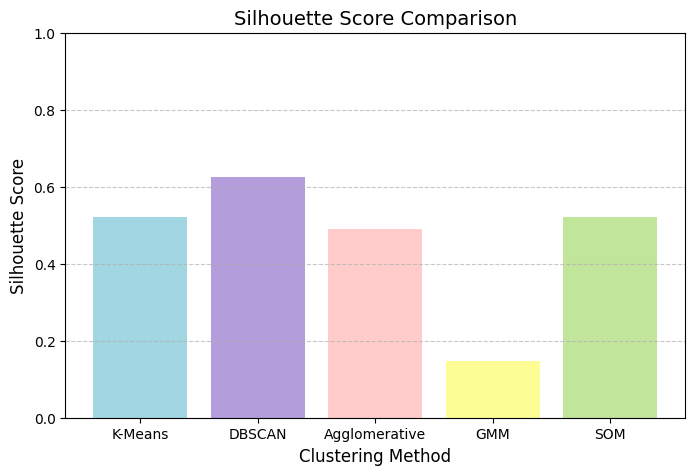

Figure 4.2.1: Silhouette Scores for different clustering methods.
DBSCAN achieved the highest Silhouette Score, demonstrating its ability
to identify dense and distinct clusters effectively.
KMeans and SOM provided moderate performance, with SOM achieving
results comparable to KMeans. Agglomerative Clustering and GMM showed lower scores.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Updated Clustering Results Data
clustering_data = {
    "Clustering Method": ["K-Means", "DBSCAN", "Agglomerative", "GMM", "SOM"],
    "Silhouette Score": [0.5205, 0.6249, 0.4892, 0.1481, 0.5205]
}
df_clustering = pd.DataFrame(clustering_data)

# Save DataFrame to Google Drive as CSV
df_clustering.to_csv('/content/drive/My Drive/Clustering_Results.csv', index=False)

# Display clustering results as a table
print("4.2.1 Customer Segmentation Results Summary:")
display(df_clustering)

# Bar plot for Silhouette Scores
methods = clustering_data["Clustering Method"]
scores = clustering_data["Silhouette Score"]

plt.figure(figsize=(8, 5))
# Use pastel colors for the bars
pastel_colors = ['#a1d6e2', '#b39ddb', '#ffcccb', '#fdfd96', '#c2e59c']  # Light pastel colors
plt.bar(methods, scores, color=pastel_colors)

# Graph settings
plt.title("Silhouette Score Comparison", fontsize=14)
plt.xlabel("Clustering Method", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability

# Save the graph before showing it
plt.savefig('/content/drive/My Drive/Figure_4_2_1.png')

# Show the graph
plt.show()

# Caption for the graph
print("Figure 4.2.1: Silhouette Scores for different clustering methods.\n"
      "DBSCAN achieved the highest Silhouette Score, demonstrating its ability\n"
      "to identify dense and distinct clusters effectively.\n"
      "KMeans and SOM provided moderate performance, with SOM achieving\n"
      "results comparable to KMeans. Agglomerative Clustering and GMM showed lower scores.")


##### 4.2.2 CLV Prediction


4.2.2 CLV Prediction Results Summary:


,Model,RMSE,MAE
0,Linear Regression,0.0008,0.0006
1,Decision Tree,0.1243,0.0186
2,Random Forest,0.0281,0.0077
3,XGBoost,0.0920,0.0186


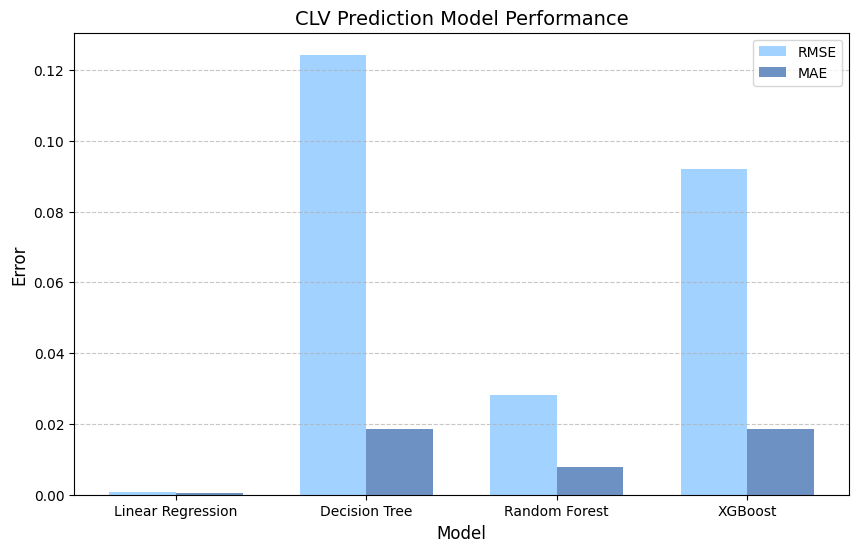

Figure 4.2.2: Comparison of RMSE and MAE for CLV prediction models.
Linear Regression achieved the best performance, with the lowest RMSE and MAE values,
indicating its suitability for this dataset's predominantly linear relationships.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# CLV Results Data with updated metrics
clv_data = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "XGBoost"],
    "RMSE": [0.0008, 0.1243, 0.0281, 0.0920],
    "MAE": [0.0006, 0.0186, 0.0077, 0.0186]
}
df_clv = pd.DataFrame(clv_data)

# Save DataFrame to Google Drive as CSV
df_clv.to_csv('/content/drive/My Drive/CLV_Prediction_Results.csv', index=False)

# Display CLV prediction results as a table
print("\n4.2.2 CLV Prediction Results Summary:")
display(df_clv)

# Bar plot for RMSE and MAE
models = clv_data["Model"]
rmse = clv_data["RMSE"]
mae = clv_data["MAE"]

x = np.arange(len(models))  # Position for each bar
width = 0.35

plt.figure(figsize=(10, 6))

# Use pastel blue tones for the bars
plt.bar(x - width/2, rmse, width, label="RMSE", color="#a2d2ff")  # Light pastel blue
plt.bar(x + width/2, mae, width, label="MAE", color="#6c91c2")  # Deeper pastel blue

# Graph settings
plt.title("CLV Prediction Model Performance", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Error", fontsize=12)
plt.xticks(x, models, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the graph before showing it
plt.savefig('/content/drive/My Drive/Figure_4_2_2.png')

# Show the graph
plt.show()

# Caption for the graph
print("Figure 4.2.2: Comparison of RMSE and MAE for CLV prediction models.\n"
      "Linear Regression achieved the best performance, with the lowest RMSE and MAE values,\n"
      "indicating its suitability for this dataset's predominantly linear relationships.")


#### 4.3 Model Inference

##### 4.3.1 Best-Performing Model

 * Among the CLV prediction models, **Linear Regression** achieved the lowest RMSE (0.0008) and MAE (0.0006), demonstrating its superior accuracy in this dataset. The minimal error values highlight its effectiveness in capturing the predominantly linear relationships within the data.
 *  **Why Linear Regression Excelled**: The dataset's structure likely exhibited strong linear tendencies, allowing Linear Regression to achieve high accuracy with minimal complexity. Its simplicity and efficiency made it an ideal choice for this particular use case.

##### 4.3.2 Segmentation Insights

*   The **DBSCAN Clustering** achieved the highest Silhouette Score (0.6249), indicating its effectiveness at identifying distinct and dense customer groups, especially in datasets with noise or outliers. On the other hand, the KMeans Clustering method, with a Silhouette Score of 0.5205, provided moderately clear segmentation based on the Elbow Method but assumed spherical clusters, which might limit its flexibility for more complex patterns.
*   **Connection to Visualization**: As shown in Figure 4.2.1, DBSCAN significantly outperformed other methods in cluster separation, highlighting its ability to handle irregularly shaped clusters effectively.

##### 4.3.3 Model Comparison

 *   **Linear Regression** was the best-performing model for CLV prediction, with the lowest errors (RMSE: 0.0008, MAE: 0.0006), reflecting its suitability for datasets with primarily linear relationships. Ensemble-based methods, like **Random Forest** and **XGBoost**, excelled in handling more complex non-linear relationships but did not surpass the accuracy of Linear Regression.
 *   **Why Ensemble Models Are Better**: Ensemble models aggregate predictions from multiple learners, effectively capturing non-linear interactions while mitigating overfitting. **Random Forest**, in particular, leveraged its ensemble nature to achieve a strong balance between accuracy and generalization, achieving RMSE: 0.0281 and MAE: 0.0077, which were significantly lower than other ensemble methods.
 *   **Connection to Visualization**: In **Figure 4.2.2**, Linear Regression outperformed other models in RMSE and MAE metrics, highlighting its efficiency and accuracy for this dataset's characteristics.



#### 4.4 Discussion

* **Impact of CLV Prediction**: Accurate CLV predictions allow for more personalized marketing and resource allocation, focusing on high-value customers. This can drive targeted engagement strategies and improved customer satisfaction.

* **Segmentation Benefits**: By identifying distinct customer segments, businesses can tailor their strategies to meet the specific needs and behaviors of each segment, optimizing marketing efficiency and fostering customer loyalty.

* **Challenges and Future Improvements**:

 * **Challenges**: LightGBM was initially explored but was removed due to persistent configuration issues, which hindered its effectiveness for this dataset.
 * **Future Improvements**: Potential improvements include experimenting with additional advanced algorithms, tuning hyperparameters further, and enhancing feature engineering to capture more complex patterns.

#### 4.5 Limitations and Future Work

1. **Model Limitations and Improvement Potential**:
* **Complexity of Single Estimators**: Linear Regression and Decision Tree models provided a baseline but showed limitations in capturing complex relationships within the data. While ensemble models like Random Forest and XGBoost improved accuracy, additional parameter tuning and exploration of advanced ensemble techniques could further enhance performance.

2. **Feature Engineering Limitations**:
* **Limited External Data**: The analysis was based solely on available internal customer data. Incorporating additional external information, such as demographic or behavioral data, could improve the accuracy of both clustering and CLV prediction by providing a richer context on customer attributes.
* **Dynamic RFM Analysis**: This analysis used static RFM features, calculated at a single point in time. In future studies, tracking these features over time to capture changes in customer behavior could enable more dynamic customer segmentation.

3. **Advanced Model Techniques**:
* **Systematic Hyperparameter Tuning**: While basic parameter adjustments were made, a more comprehensive hyperparameter search (e.g., using grid search or randomized search) could lead to optimal model performance. Future work could implement a structured tuning process for each model.
* **Exploring Stacking and Other Ensemble Methods**: Experimenting with advanced ensemble techniques, such as stacking multiple models together, could yield improved predictive accuracy. By combining models with complementary strengths, a stacked model could provide more robust predictions.

4. **Alternative Clustering Approaches**:
* The analysis included several common clustering algorithms, such as KMeans, DBSCAN, and Agglomerative Clustering. Exploring additional clustering techniques, such as spectral clustering or hierarchical clustering with optimized parameters, could enhance the clarity and separability of customer segments.

5. **Validation in Real-World Settings**:
* The models were evaluated in an offline setting, and their performance in a real-world environment was not tested. Future work could involve deploying the models in a live scenario, with ongoing monitoring to assess and improve their effectiveness in real-time customer engagement strategies.